In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

31020


# 0. required packages for h5py

In [2]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [25]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'S:\puzheng\20201215-proB_DMSO_CTP-08',
             'save_folder':r'D:\Pu_Temp\20201215-proB_DMSO',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 20,
             'correction_folder':r'Z:\Corrections\20210203-Corrections_3color_35',
             'shared_parameters':{
                     'single_im_size':[35,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':125,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [26]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=3,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 49
- Number of field of views: 63
- Importing csv file: S:\puzheng\20201215-proB_DMSO_CTP-08\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 49 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 2.123s.
+ loading correction from file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ base attributes loaded:[] in 0.001s.
-- savi

In [27]:
fov.shared_parameters

{'single_im_size': [35, 2048, 2048],
 'corr_channels': ['750', '647', '561'],
 'num_empty_frames': 0,
 'corr_hot_pixel': True,
 'corr_Z_shift': False,
 'min_num_seeds': 500,
 'max_num_seeds': 2500,
 'spot_seeding_th': 125,
 'normalize_intensity_local': False,
 'normalize_intensity_background': False,
 'distance_zxy': [200, 108, 108],
 'sigma_zxy': [1.35, 1.9, 1.9],
 'num_buffer_frames': 10,
 'normalization': False,
 'corr_bleed': True,
 'corr_illumination': True,
 'corr_chromatic': True,
 'allowed_data_types': {'combo': 'c',
  'decoded': 'd',
  'unique': 'u',
  'relabeled_unique': 'l',
  'merfish': 'm',
  'rna-unique': 'r',
  'rna': 'r',
  'gene': 'g'},
 'drift_use_fft': True,
 'drift_sequential': False,
 'good_drift_th': 1.0,
 'drift_precision_fold': 100,
 'drift_correction_args': {},
 'normalize_intensity_backgroud': False,
 'empty_value': 0}

### 2. Process image into candidate spots

In [28]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 49 folders
-- checking unique, region:[41 42 43] in 0.000s.
-- checking unique, region:[44 45 46] in 0.000s.
-- checking unique, region:[47 48 49] in 0.016s.
-- checking unique, region:[50 51 52] in 0.000s.
-- checking unique, region:[53 54 55] in 0.000s.
-- checking unique, region:[56 57 59] in 0.000s.
-- checking unique, region:[60 61 62] in 0.016s.
-- checking unique, region:[63 64 65] in 0.000s.
-- checking unique, region:[66 67 68] in 0.000s.
-- checking unique, region:[69 70 71] in 0.000s.
-- checking unique, region:[72 73 74] in 0.016s.
-- checking unique, region:[75 76 77] in 0.000s.
-- checking unique, region:[78 79 80] in 0.000s.
-- checking unique, region:[81 82 83] in 0.000s.
-- checking unique, region:[84 85 86] in 0.000s.
-- checking unique, region:[87 88 89] in 0.016s.
-- checking unique, region:[90 91 92] in 0.000s.
-- checking unique, region:[93 94 95] in 0.000s.
-- checking unique, region:[96 97 98] in 0.000s.
-- checking un

In [46]:
spot_list[0].shape

(2500, 11)

# 3. Find chromosomes

## 3.1 load chromosome image

In [10]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

-- choose chrom images from folder: S.
- correct the whole fov for image: S:\puzheng\20201215-proB_DMSO_CTP-08\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_35_2048_2048.npy
-- loading image from file:S:\puzheng\20201215-proB_DMSO_CTP-08\H0R0\Conv_zscan_03.dax  in 7.980s
-- removing hot pixels for channels:['750'] in 7.091s
-- illumination correction for channels: 750, in 1.555s
-- warp image with chromatic correction for channels: ['750'] and drift:[0. 0. 0.] 750, in 73.116s
-- finish correction in 122.986s
-- chromosome image has drift: [0. 0. 0.]
-- saving fov_info to file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_im'] in 3.673s.


## 3.2 find candidate chromosomes

In [14]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99.5, 
                                                               _morphology_size=2,
                                                               _overwrite=True)

-- adjust seed image with filter size=4
-- binarize image with threshold: 99.5%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=50
-- 317 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 20 threads in 182.016s.
-- saving fov_info to file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.099s.


## 3.3 select among candidate chromosomes

In [29]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.5,
                                                         _cand_spot_intensity_th=200,
                                                         _save=True, 
                                                         _overwrite=True)

+ loading unique from file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ finish loading unique in 0.090s. 
- start select from 317 chromosomes with loss threshold=0.5
-- remove chr id 123, percentage of lost rounds:0.743.
-- remove chr id 26, percentage of lost rounds:0.688.
-- remove chr id 0, percentage of lost rounds:0.562.
-- remove chr id 204, percentage of lost rounds:0.507.
-- 313 chromosomes are kept.
-- saving fov_info to file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_coords'] in 0.226s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


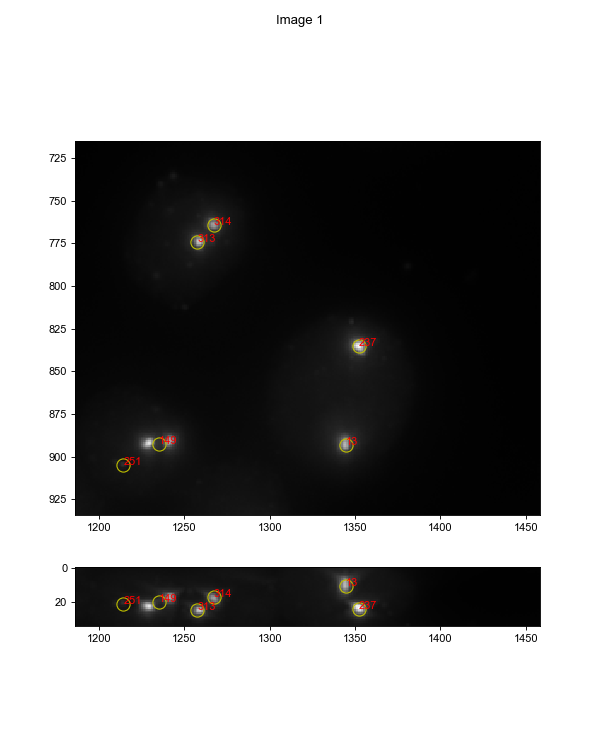

In [52]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## select spots based on chromosomes

In [17]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20201215-proB_DMSO\Conv_zscan_03.hdf5


In [18]:
fov.unique_spots_list[0].shape

(1743, 11)

In [31]:
intensity_th = 200
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 313


In [32]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [33]:
# select_hzxys close to the chromosome center
dist_th = 5000 # upper limit is 5000nm
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, fov.chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[_dists < dist_th])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

### EM pick spots

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 19.425s
-- collapse all regions into 1d.


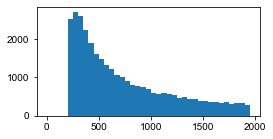

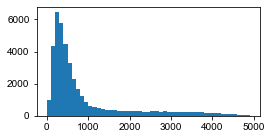

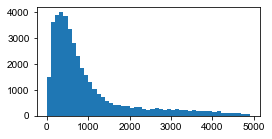

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.132s
-- region kept: 0.8388
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.937s
-- collapse all regions into 1d.


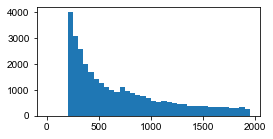

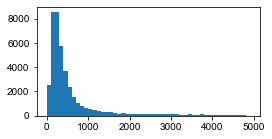

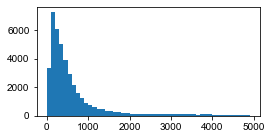

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.293s
-- region kept: 0.9672
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.156s
-- collapse all regions into 1d.


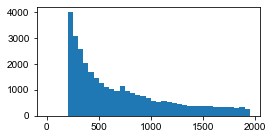

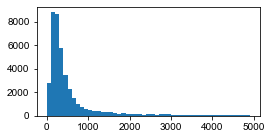

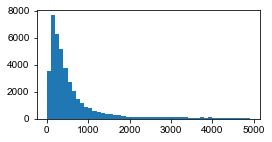

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.122s
-- region kept: 0.9840
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.906s
-- collapse all regions into 1d.


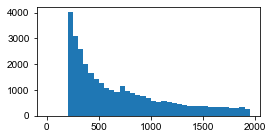

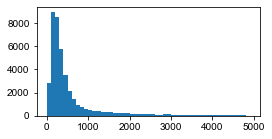

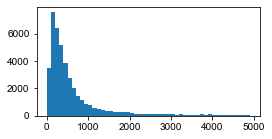

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.318s
-- region kept: 0.9876
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.906s
-- collapse all regions into 1d.


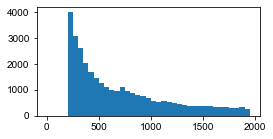

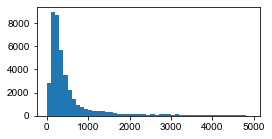

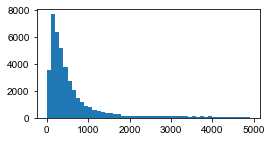

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.280s
-- region kept: 0.9890
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.911s
-- collapse all regions into 1d.


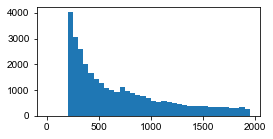

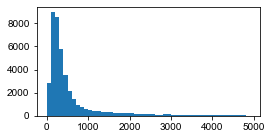

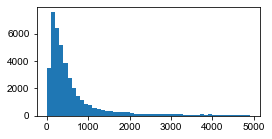

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.391s
-- region kept: 0.9893
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.813s
-- collapse all regions into 1d.


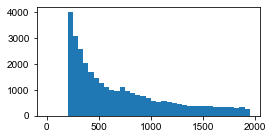

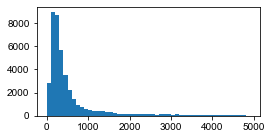

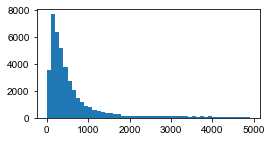

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.416s
-- region kept: 0.9895
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 7.171s
-- collapse all regions into 1d.


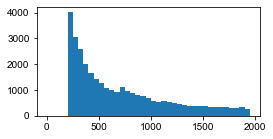

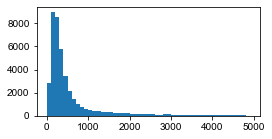

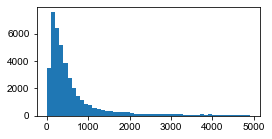

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.254s
-- region kept: 0.9897
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.908s
-- collapse all regions into 1d.


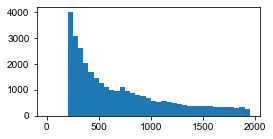

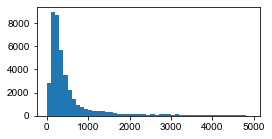

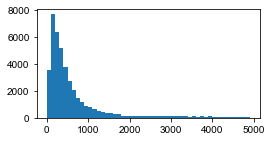

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.216s
-- region kept: 0.9897
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 32 threads, in 6.953s
-- collapse all regions into 1d.


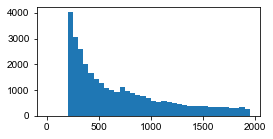

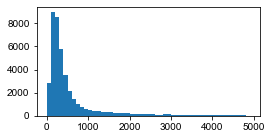

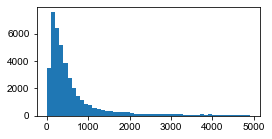

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 32 threads, in 7.195s
-- region kept: 0.9897


In [34]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 32
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,2000,50))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.998:
        break

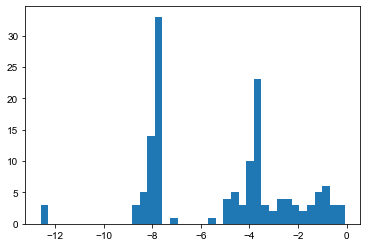

In [35]:
plt.figure()
plt.hist(np.log(sel_dna_scores_list[-1][1]), 40)
plt.show()

In [36]:
from scipy.spatial.distance import pdist, squareform

sel_iter = -1

final_dna_hzxys_list = []
distmap_list = []
score_th = np.exp(-6)
bad_spot_percentage = 0.5
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

E:\Users\puzheng\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


0.3660071942446044


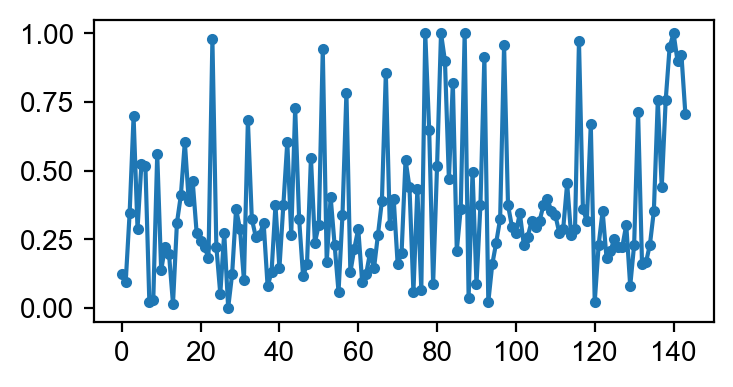

In [37]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,150,20))
plt.show()

In [40]:
kept_inds = np.where(loss_rates<0.5)[0]

<IPython.core.display.Javascript object>


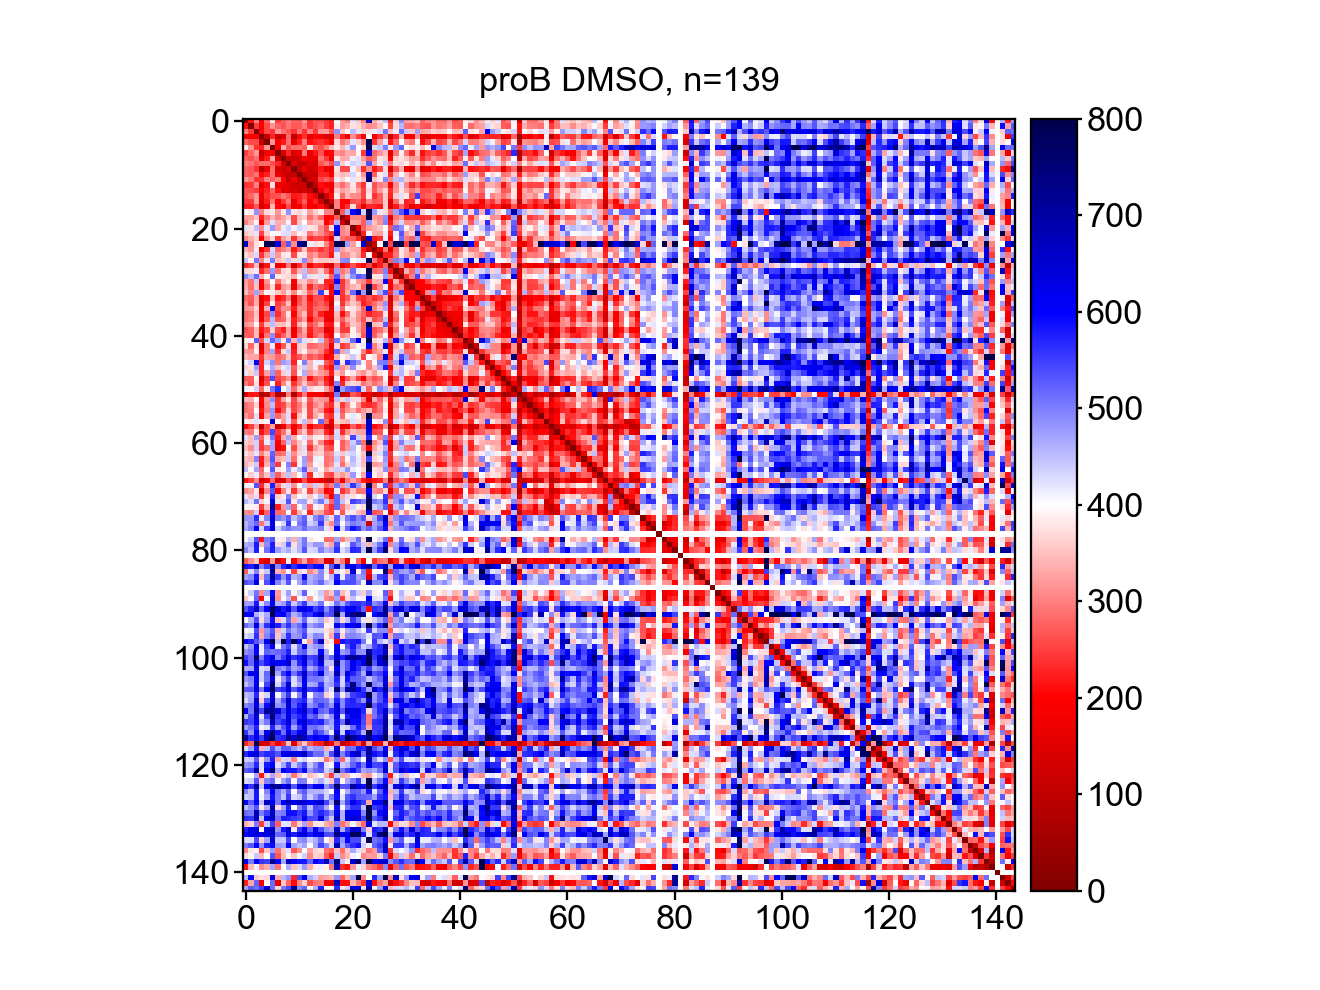

In [49]:
fig, ax = plt.subplots(figsize=(4,3),dpi=300)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap,
                                               #median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,800],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"proB DMSO, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

## visualize single example

<IPython.core.display.Javascript object>


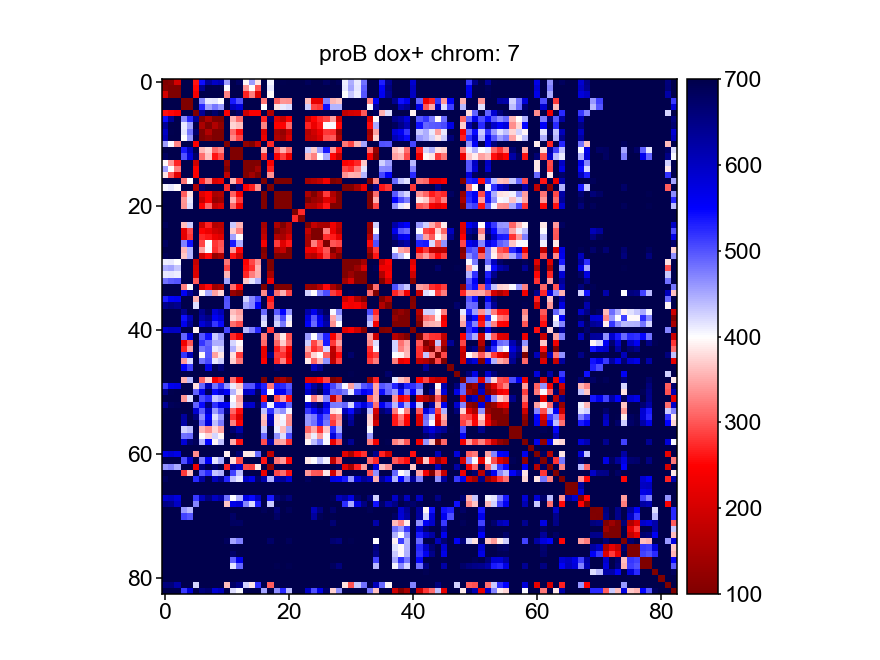

<IPython.core.display.Javascript object>


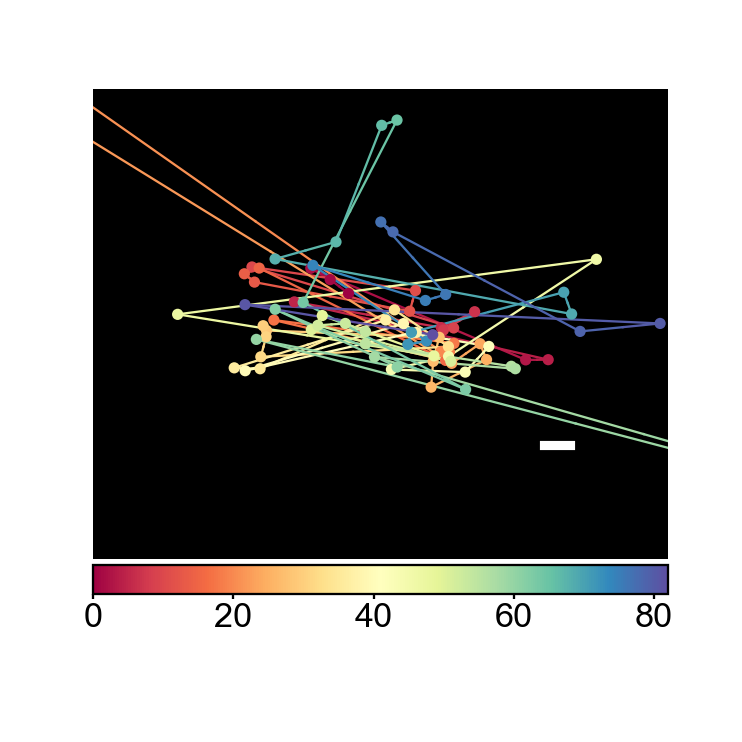

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x0000024D030795F8>


In [43]:
%matplotlib notebook
chrom_id = 7

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#distmap_list[chrom_id],
                                               distmap_list[chrom_id][valid_inds][:,valid_inds], 
                                               color_limits=[100,700],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"proB dox+ chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()



reload(figure_tools.image)
ax3d = figure_tools.image.chromosome_structure_3d_rendering(#final_dna_hzxys_list[chrom_id][:,1:], 
                                                     final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
                                                     marker_edge_line_width=0,
                                                     reference_bar_length=100, image_radius=500, 
                                                     line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

## visualize all fitted spots

In [47]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _unique_chs = np.array([int(_ch) for _ch in _grp['channels'][:]])

intensity_dict = {}
for _ch in np.unique(_unique_chs):
    _ints = np.array(final_dna_hzxys_list)[:,np.where(_unique_chs==_ch)[0],0]
    intensity_dict[_ch] = _ints[np.isnan(_ints)==False]

<IPython.core.display.Javascript object>


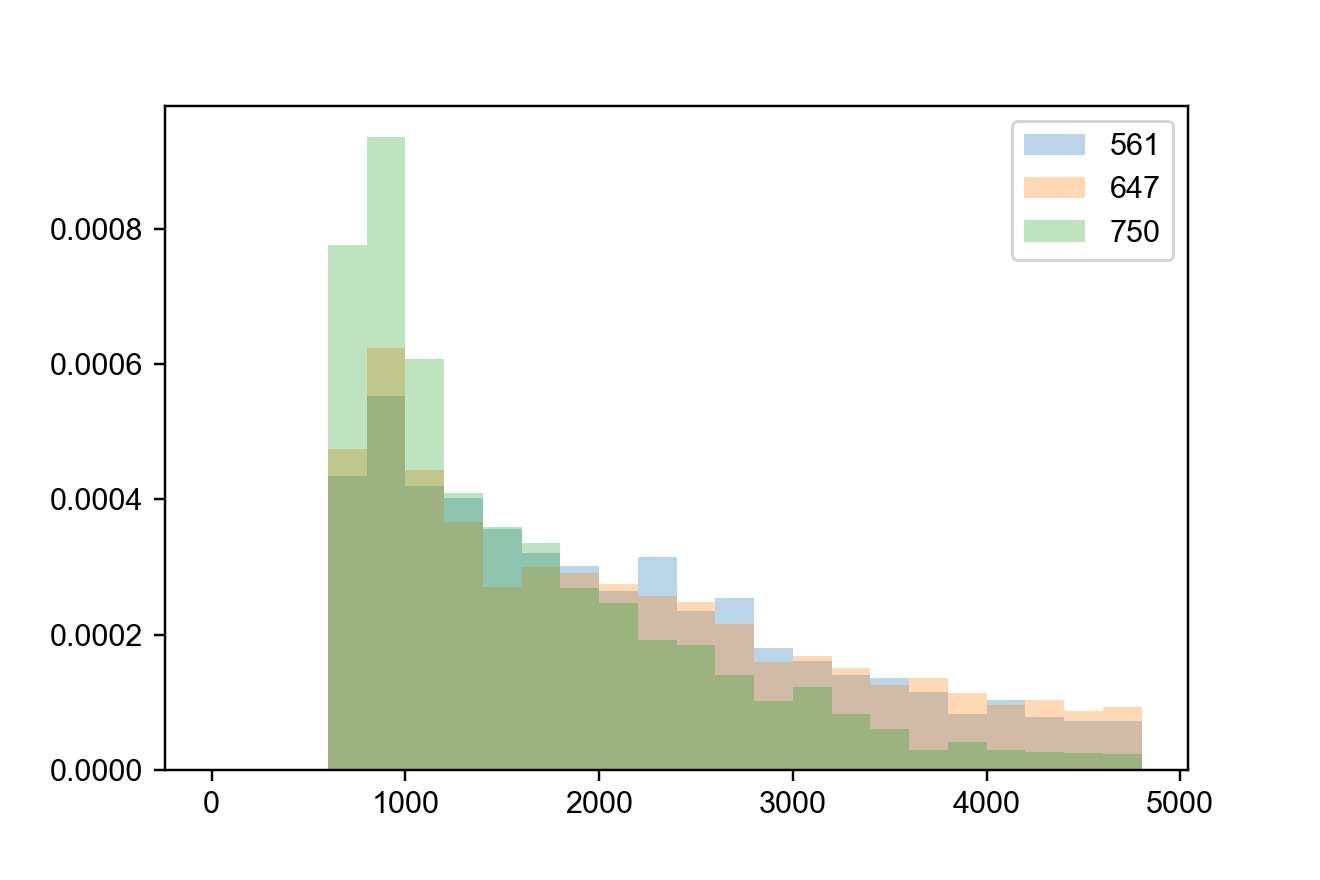

In [51]:
plt.figure(dpi=200)
for _ch, _ints in intensity_dict.items():
    plt.hist(_ints, bins=np.arange(0,5000,200), 
             alpha=0.3, label=f"{_ch}", density=True)
plt.legend()
plt.show()

In [24]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _ind = list(_grp['ids'][:]).index(41)
    _im = _grp['ims'][_ind]
    sel_drifts = _grp['drifts'][:,:]
    sel_flags = _grp['flags'][:]
    sel_ids = _grp['ids'][:]
    sel_spots = _grp['spots'][:,:,:]
    print(_ind, np.sum(_grp['spots'][1]))

0 4284598.5


In [25]:
sel_ids

array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

<IPython.core.display.Javascript object>


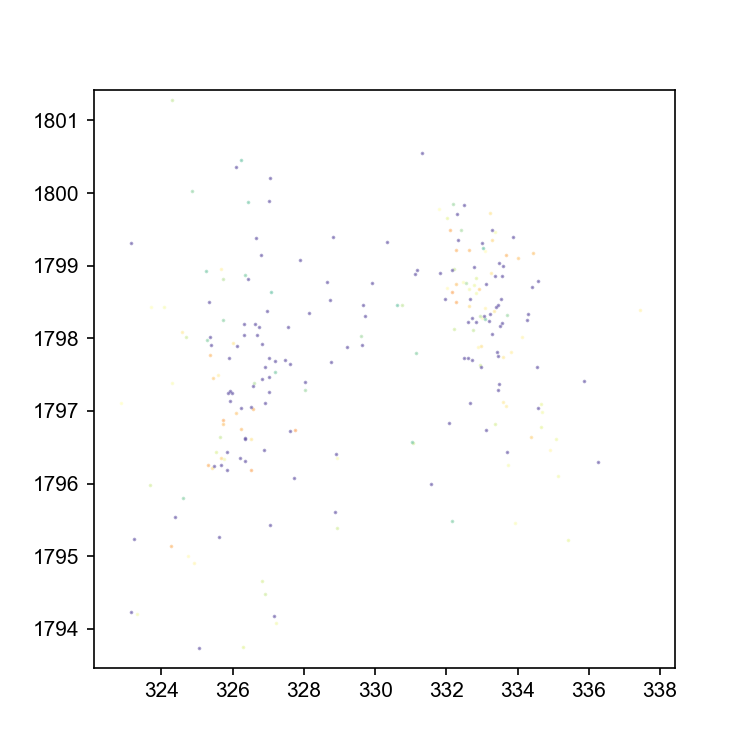

In [27]:
%matplotlib notebook
from matplotlib.cm import Spectral
plt.figure(figsize=(5,5),dpi=150)
for _id,_s in zip(sel_ids, kept_spots_list):
    plt.plot(_s[:,2],_s[:,3], '.', label=f'{_id}', 
             markersize=1.5, color=Spectral(_id/len(sel_ids)), alpha=0.5)
#plt.legend()
plt.ylim([0,2048])
plt.xlim([0,2048])
#plt.legend()
plt.show()

array([[0.98592849, 0.63737024, 0.35963091, 1.        ],
       [0.98869666, 0.65736255, 0.36885813, 1.        ],
       [0.99146482, 0.67735486, 0.37808535, 1.        ],
       [0.99238754, 0.69388697, 0.39008074, 1.        ],
       [0.99269512, 0.70926567, 0.40299885, 1.        ],
       [0.9928489 , 0.71695502, 0.4094579 , 1.        ],
       [0.99315648, 0.73233372, 0.42237601, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.99377163, 0.76309112, 0.44821223, 1.        ],
       [0.99392541, 0.77078047, 0.45467128, 1.        ],
       [0.99423299, 0.78615917, 0.46758939, 1.        ],
       [0.99454056, 0.80153787, 0.4805075 , 1.        ],
       [0.99484814, 0.81691657, 0.49342561, 1.        ],
       [0.99515571, 0.83229527, 0.50634371, 1.        ],
       [0.9953095 , 0.83998462, 0.51280277, 1.        ],
       [0.99561707, 0.85536332, 0.52572088, 1.        ],
       [0.99592464, 0.87074202, 0.53863899, 1.        ],
       [0.99638601, 0.88796617,

## visualize picked hzxys

<IPython.core.display.Javascript object>


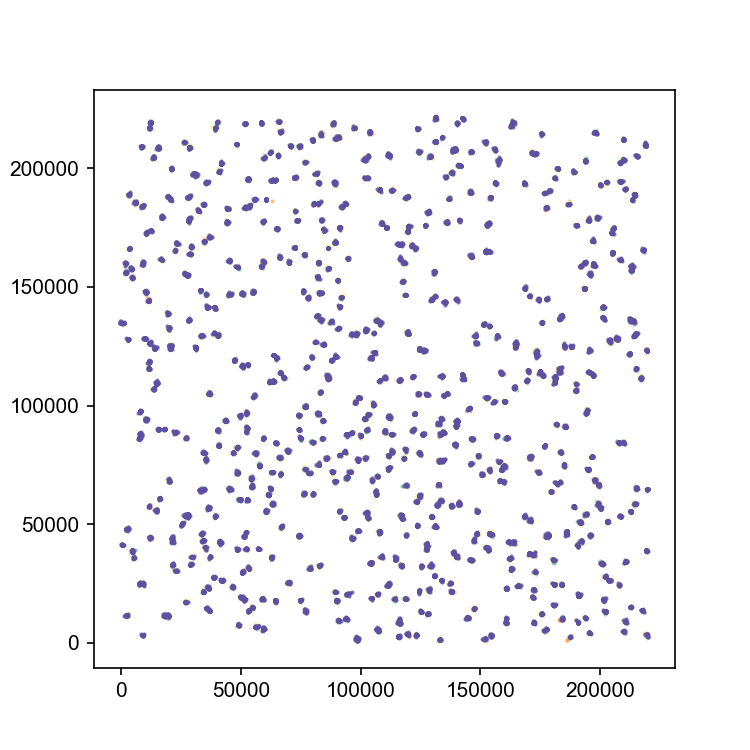

In [35]:
%matplotlib notebook
from matplotlib.cm import Spectral
plt.figure(figsize=(5,5),dpi=150)

for _i, _id in enumerate(sel_ids):
    plt.plot([_spots[_i,2] for _spots in final_dna_hzxys_list],
             [_spots[_i,3] for _spots in final_dna_hzxys_list],
             '.', markersize=2, color=Spectral(_id/len(sel_ids)), alpha=0.7)
#for _id,_s in zip(sel_ids, kept_spots_list):
#    plt.plot(_s[:,2],_s[:,3], '.', label=f'{_id}', 
#             markersize=1.5, color=Spectral(_id/len(sel_ids)), alpha=0.5)
#plt.legend()
#plt.ylim([0,2048])
#plt.xlim([0,2048])
#plt.legend()
plt.show()

## visualize fitted spots with chromosomes

<IPython.core.display.Javascript object>


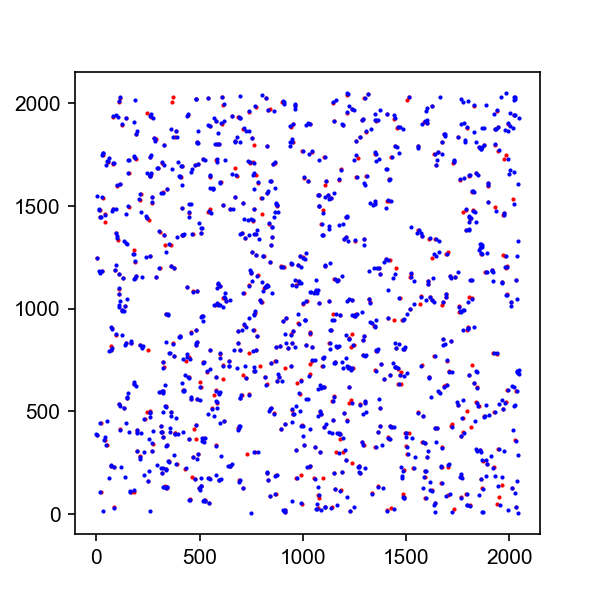

In [43]:
plt.figure(figsize=(4,4),dpi=150)
plt.plot(fov.chrom_coords[:,1], fov.chrom_coords[:,2], 'r.', markersize=2)
plt.plot(fov.unique_spots_list[0][:,2], fov.unique_spots_list[0][:,3], 'b.', markersize=2)